# Predictive Maintenance for Centrifugal Pumps: Exploratory Data Analysis

## Project Overview

This Jupyter Notebook documents the Exploratory Data Analysis (EDA) process for a synthetic dataset of centrifugal pump sensor readings. The goal of this project is to develop a predictive maintenance model that can identify potential pump failures before they occur, reducing downtime and optimizing operational efficiency.

This project is part of a portfolio to showcase data science skills, with the aim of demonstrating the application of data science and machine learning to real-world engineering problems, specifically in the context of industrial equipment maintenance and predictive analytics.

## Author

**Name:** Muhammad Rizky Raihan

**Email:** mrraihan2002@gmail.com

**GitHub:** [Github Profile](https://github.com/mrraihan29)

**LinkedIn:** [LinkedIn Profile](https://www.linkedin.com/in/mrraihan/)

## Dataset Description

The dataset used in this project is a synthetic dataset generated using a sophisticated simulation model that incorporates:

*   **Physical Modeling:** A simplified computational fluid dynamics (CFD)-inspired approach to simulate pump behavior, including relationships between flow rate, head, power, motor current, and Net Positive Suction Head (NPSH).
*   **Component-Specific Degradation:** Individual modeling of impeller, bearing, and seal degradation using physics-based and machine learning approaches.
*   **Realistic Failure Simulation:** Modeling of multiple failure modes (bearing, seal, impeller) using Weibull distributions and failure propagation.
*   **External Factor Modeling:** Inclusion of environmental factors (ambient temperature, humidity) and operational variability.
*   **Generative Models:** Use of Generative Adversarial Networks (GANs) and Variational Autoencoders (VAEs) to enhance the realism of the generated data.

The dataset includes the following features:

*   `pump_id`: Unique identifier for each pump.
*   `timestamp`: Date and time of the sensor reading.
*   `flow_rate`: Rate at which fluid is being pumped (m³/h).
*   `discharge_pressure`: Pressure of the fluid after the pump (bar).
*   `motor_current`: Electric current drawn by the pump motor (Amperes).
*   `motor_vibration`: Vibration levels of the pump motor (mm/s).
*   `bearing_temperature`: Temperature of the pump bearings (°C).
*   `impeller_wear_rate`: Wear rate of the pump impeller.
*   `impeller_surface_roughness`: Surface roughness of the pump impeller.
*   `impeller_efficiency_loss`: Efficiency loss of the pump impeller.
*   `seal_leakage_rate`: Leakage rate of the pump seal.
*   `power`: Hydraulic power of the pump (kW).
*   `efficiency`: Efficiency of the pump (%).
*   `ambient_temperature`: Ambient temperature (°C).
*   `humidity`: Relative humidity (%).
*   `degradation_physics`: Degradation value calculated using a physics-based model.
*   `degradation_ml`: Degradation value calculated using a machine learning model.
*   `failure_predicted`: Binary indicator of whether a failure is predicted at a given time step.
*   `maintenance_event`: Binary indicator of whether a maintenance event occurred at a given time step.

The dataset spans a period of [Number] years, starting from [Start Date], and includes data for [Number] pumps.

## Exploratory Data Analysis (EDA)

This notebook will explore the dataset using various statistical and visualization techniques, including:

*   **Data Overview:** Understanding the structure, data types, and basic statistics of the dataset.
*   **Univariate Analysis:** Examining the distribution of individual variables using histograms, box plots, and distribution plots.
*   **Bivariate Analysis:** Exploring the relationships between pairs of variables using scatter plots, correlation matrices, and line plots.
*   **Time Series Analysis:** Analyzing the time series behavior of key variables.
*   **Failure and Maintenance Analysis:** Investigating the distribution and impact of failure and maintenance events.
*   **Data Quality Assessment:** Checking for missing values, outliers, and inconsistencies.
*   **Data Testing:** Performing various statistical tests to ensure the data quality.

The insights gained from this EDA will inform the subsequent feature engineering and model development stages of the project.

## Notebook Outline

1.  **Data Overview**
2.  **Univariate Analysis**
3.  **Bivariate Analysis**
4.  **Time Series Analysis**
5.  **Failure and Maintenance Analysis**
6.  **Data Quality Assessment**
7.  **Data Testing**
8.  **Conclusion**

---

# 1. Data Overview
Let's start with importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [6]:
file_path = "maximum_synthetic_pump_data.csv"
df = pd.read_csv("../data/maximum_synthetic_pump_data.csv")

print("First 5 rows of the DataFrame:")
df.head()

First 5 rows of the DataFrame:


,pump_id,timestamp,flow_rate,discharge_pressure,motor_current,motor_vibration,bearing_temperature,impeller_wear_rate,impeller_surface_roughness,impeller_efficiency_loss,seal_leakage_rate,power,efficiency,ambient_temperature,humidity,degradation_physics,degradation_ml,failure_predicted,maintenance_event
0,1,2020-01-01 00:00:00,102.483571,0.000000,0.000000,0.240000,24.000000,0.000102,0.010123,5.124179e-07,0.000000,0.000000,0.000000,25.000000,0.200000,0.000000,-0.000228,False,True
1,1,2020-01-01 01:00:00,105.136041,0.255765,1.492215,0.239925,23.992531,0.000208,0.014409,2.076196e-06,80.879937,0.746947,0.024372,25.007173,0.200000,0.000000,-0.442630,False,False
2,1,2020-01-01 02:00:00,107.607749,0.499982,2.985636,0.239776,23.977586,0.000315,0.017755,3.152274e-06,238.988108,1.494498,0.048764,25.014345,0.200000,-0.000015,-0.371442,False,False
3,1,2020-01-01 03:00:00,109.730254,0.714225,4.349109,0.239558,23.955816,0.000425,0.020615,4.249576e-06,464.845793,2.177002,0.071033,25.021518,0.200000,-0.000045,-0.313806,False,False
4,1,2020-01-01 04:00:00,111.358908,0.881456,5.447093,0.239285,23.928549,0.000536,0.023159,5.363165e-06,743.586766,2.726612,0.088966,25.028690,0.199999,-0.000087,-0.296560,False,False


In [10]:
df.shape

(438000, 19)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438000 entries, 0 to 437999
Data columns (total 19 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   pump_id                     438000 non-null  int64  
 1   timestamp                   438000 non-null  object 
 2   flow_rate                   438000 non-null  float64
 3   discharge_pressure          438000 non-null  float64
 4   motor_current               438000 non-null  float64
 5   motor_vibration             438000 non-null  float64
 6   bearing_temperature         438000 non-null  float64
 7   impeller_wear_rate          438000 non-null  float64
 8   impeller_surface_roughness  438000 non-null  float64
 9   impeller_efficiency_loss    438000 non-null  float64
 10  seal_leakage_rate           438000 non-null  float64
 11  power                       438000 non-null  float64
 12  efficiency                  438000 non-null  float64
 13  ambient_temper

In [13]:
df.describe()

,pump_id,flow_rate,discharge_pressure,motor_current,motor_vibration,bearing_temperature,impeller_wear_rate,impeller_surface_roughness,impeller_efficiency_loss,seal_leakage_rate,power,efficiency,ambient_temperature,humidity,degradation_physics,degradation_ml
count,438000.000000,438000.000000,438000.000000,438000.000000,438000.000000,438000.000000,438000.000000,438000.000000,4.380000e+05,438000.000000,438000.000000,438000.000000,438000.000000,4.380000e+05,4.380000e+05,438000.000000
mean,25.500000,100.551747,0.617630,3.455775,0.131686,13.168615,0.440505,0.625614,4.404362e-03,34959.122685,1.729832,0.058081,25.000000,-6.553865e-18,-8.852414e-03,0.023112
std,14.430886,8.473566,0.310527,1.806920,0.066928,6.692765,0.255336,0.221613,2.553194e-03,19607.169815,0.904477,0.030425,7.071076,1.414215e-01,9.831721e-02,1.105393
min,1.000000,80.807071,0.000000,0.000000,0.005867,0.586707,0.000090,0.009476,4.489282e-07,0.000000,0.000000,0.000000,15.000000,-2.000000e-01,-3.022225e-01,-3.824433
25%,13.000000,94.001785,0.401230,2.061542,0.073722,7.372235,0.219834,0.468864,2.197354e-03,18030.074734,1.031931,0.034195,17.928932,-1.414214e-01,-6.541275e-02,-0.540126
50%,25.500000,100.147123,0.684390,3.675059,0.118330,11.833011,0.439573,0.663003,4.394669e-03,34889.260905,1.839597,0.062766,25.000000,-1.224647e-17,7.855967e-18,0.026693
75%,38.000000,107.037503,0.886109,4.690677,0.194356,19.435578,0.659320,0.811985,6.592214e-03,51750.477355,2.347978,0.078718,32.071068,1.414214e-01,5.487759e-02,0.499663
max,50.000000,120.606680,1.178607,6.905703,0.240000,24.000000,0.960468,0.980035,9.604677e-03,80325.969981,3.456737,0.120553,35.000000,2.000000e-01,2.240302e-01,5.353888


### Dataset Dimensions

The dataset contains **438000** rows and **19** columns.

### Data Types

The data types of the columns are as follows:

*   `pump_id`: int64
*   `timestamp`: object
*   `flow_rate`: float64
*   `discharge_pressure`: float64
*   `motor_current`: float64
*   `motor_vibration`: float64
*   `bearing_temperature`: float64
*   `impeller_wear_rate`: float64
*   `impeller_surface_roughness`: float64
*   `impeller_efficiency_loss`: float64
*   `power`: float64
*   `efficiency`: float64
*   `ambient_temperature`: float64
*   `humidity`: float64
*   `degradation_physics`: float64
*   `degradation_ml`: float64
*   `failure_predicted`: bool
*   `maintenance_event`: bool

Most of the numerical columns have a data type of float64, which is as expected!

### Missing Values

There are no missing values in the dataset. so we can skip the data cleaning process :)

### Descriptive Statistics

Here’s a quick breakdown of the key numbers for each column in the dataset:

| **Column**                     | **Count** | **Mean** | **Std Dev** | **Min** | **25%** | **Median** | **75%** | **Max** |
|--------------------------------|-----------|----------|-------------|---------|---------|-----------|---------|---------|
| **pump_id**                    | 438,000   | 25.5     | 14.43       | 1.0     | 13.0    | 25.5      | 38.0    | 50.0    |
| **flow_rate**                  | 438,000   | 100.55   | 8.47        | 80.81   | 94.00   | 100.15    | 107.04  | 120.61  |
| **discharge_pressure**         | 438,000   | 0.62     | 0.31        | 0.00    | 0.40    | 0.68      | 0.89    | 1.18    |
| **motor_current**              | 438,000   | 3.46     | 1.81        | 0.00    | 2.06    | 3.68      | 4.69    | 6.91    |
| **motor_vibration**            | 438,000   | 0.13     | 0.07        | 0.01    | 0.07    | 0.12      | 0.19    | 0.24    |
| **bearing_temperature**        | 438,000   | 13.17    | 6.69        | 0.59    | 7.37    | 11.83     | 19.44   | 24.00   |
| **impeller_wear_rate**         | 438,000   | 0.44     | 0.26        | 0.00    | 0.22    | 0.44      | 0.66    | 0.96    |
| **impeller_surface_roughness** | 438,000   | 0.63     | 0.22        | 0.01    | 0.47    | 0.66      | 0.81    | 0.98    |
| **impeller_efficiency_loss**   | 438,000   | 0.0044   | 0.0026      | 0.00    | 0.0022  | 0.0044    | 0.0066  | 0.0096  |
| **seal_leakage_rate**          | 438,000   | 34,959.1 | 19,607.2    | 0.0     | 18,030  | 34,889    | 51,750  | 80,326  |
| **power**                      | 438,000   | 1.73     | 0.90        | 0.00    | 1.03    | 1.84      | 2.35    | 3.46    |
| **efficiency**                 | 438,000   | 0.058    | 0.030       | 0.00    | 0.034   | 0.063     | 0.079   | 0.12    |
| **ambient_temperature**        | 438,000   | 25.0     | 7.07        | 15.0    | 17.93   | 25.0      | 32.07   | 35.0    |
| **humidity**                   | 438,000   | ~0       | 0.14        | -0.20   | -0.14   | ~0        | 0.14    | 0.20    |
| **degradation_physics**        | 438,000   | -0.009   | 0.098       | -0.30   | -0.07   | ~0        | 0.05    | 0.22    |
| **degradation_ml**             | 438,000   | 0.023    | 1.11        | -3.82   | -0.54   | 0.03      | 0.50    | 5.35    |


### Observations

Here’s what stands out after reviewing the data:

1. **Flow Rate**: Most flow rates are tightly grouped around the mean of 100.55, with values ranging from about 81 to 121. This suggests the pumps generally operate within a steady range.

2. **Motor Vibration**: The vibration levels are low and stable, with a small range (0.0059 to 0.24). This indicates the motors are running smoothly under normal conditions.

3. **Seal Leakage Rate**: This column has a huge range, from 0 to over 80,000, and a very high standard deviation. This could mean there are significant outliers or possibly some unusual circumstances affecting certain pumps.

4. **Impeller Metrics**:
   - The **wear rate** averages around 0.44, with a maximum of 0.96. Most values cluster tightly around the mean, indicating predictable wear patterns.
   - **Efficiency loss** is very small, with most values under 0.01, showing that the impellers are generally functioning well.

5. **Degradation Indicators**:
   - **Degradation (Physics)**: This hovers near zero, ranging from -0.30 to 0.22, suggesting minimal degradation overall.
   - **Degradation (ML)**: This shows more variability, spanning from -3.82 to 5.35, so some pumps may be degrading more quickly than others.

6. **Ambient Conditions**:
   - The temperature is evenly spread between 15°C and 35°C, with a mean of 25°C. These are reasonable operating conditions for most industrial pumps.
   - Humidity values fluctuate between -0.20 and 0.20, centered close to zero, which might represent normalized data.

---

### Notable Issues or Anomalies

- **Motor Current**: There are some zero values, which might be a sign of missing or faulty readings since a motor typically wouldn’t run without drawing some current.
- **Seal Leakage Rate**: The large range and high variability could indicate inconsistent data or a need for further investigation into potential outliers.
- **Degradation ML**: The wide range (-3.82 to 5.35) suggests that degradation rates differ significantly across pumps, which may warrant a closer look at specific cases.

Overall, the data seems solid and offers a lot of useful insights.

---

# **2. Univariate Analysis**
### **What is Univariate Analysis?**

Univariate analysis involves examining each variable in the dataset individually. This helps us understand the distribution, central tendency, and spread of each variable. In simpler terms, we're going to look at each column of our data, one by one, to see what kind of values it holds and how those values are spread out.

Univariate Analysis for column: flow_rate


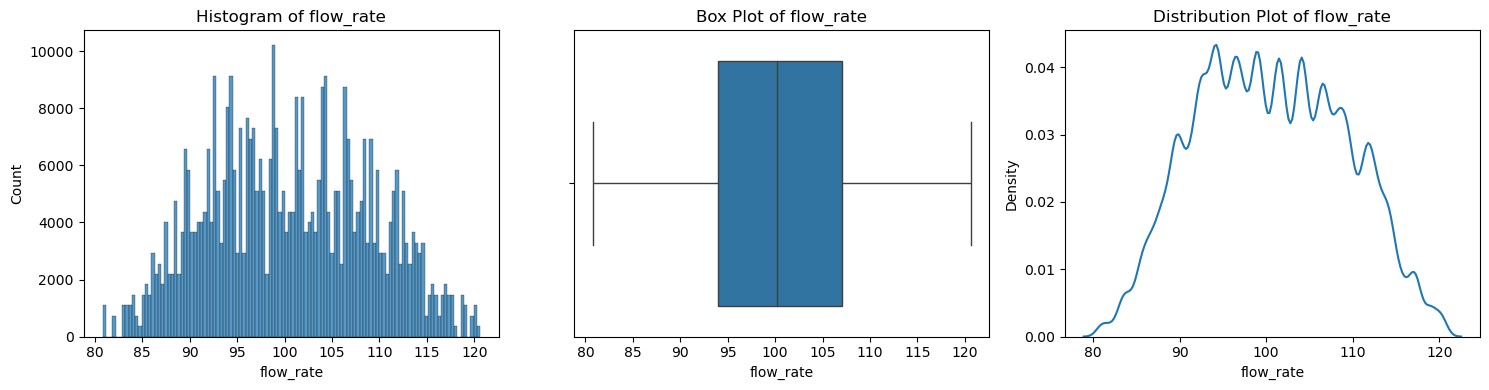

--------------------------------------------------
Univariate Analysis for column: discharge_pressure


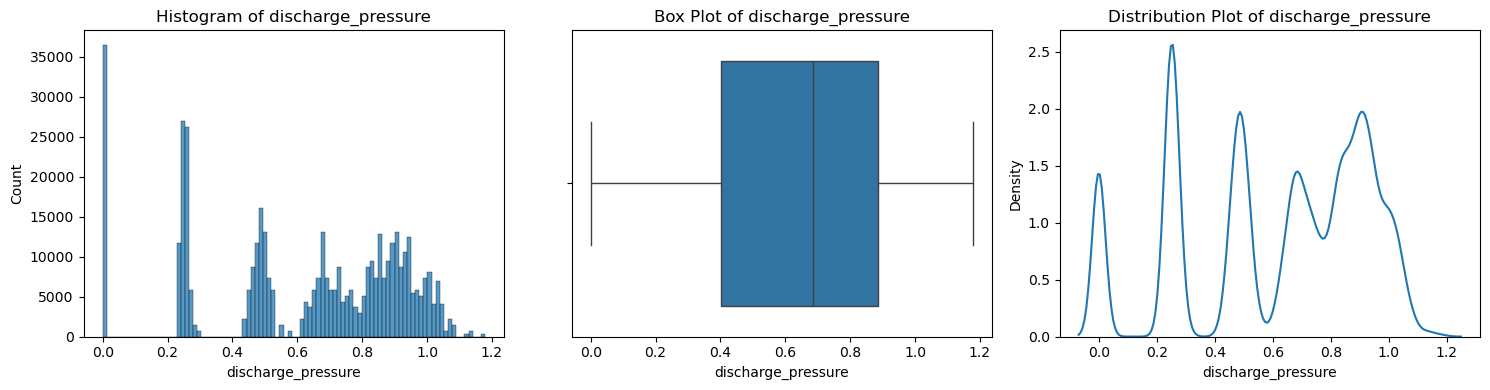

--------------------------------------------------
Univariate Analysis for column: motor_current


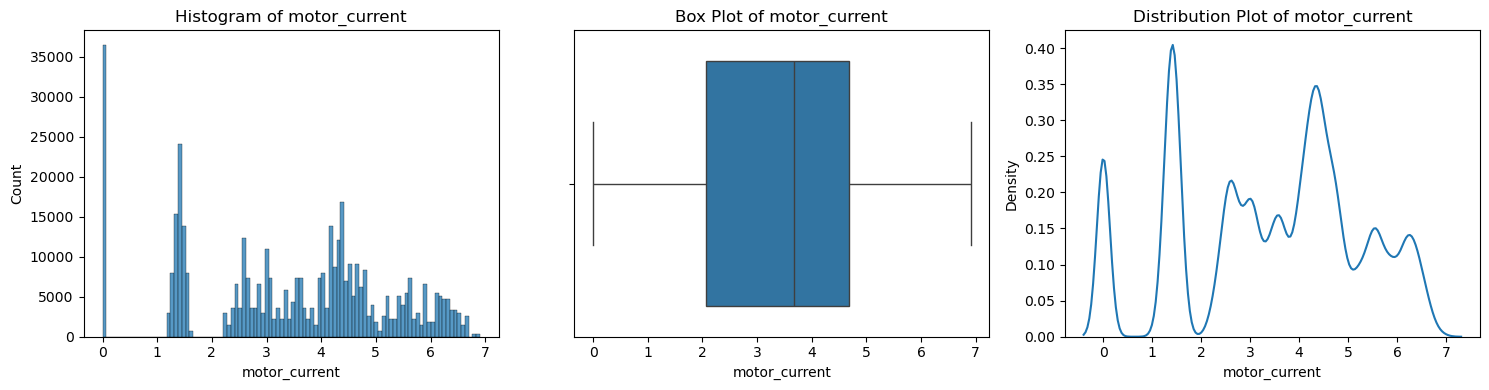

--------------------------------------------------
Univariate Analysis for column: motor_vibration


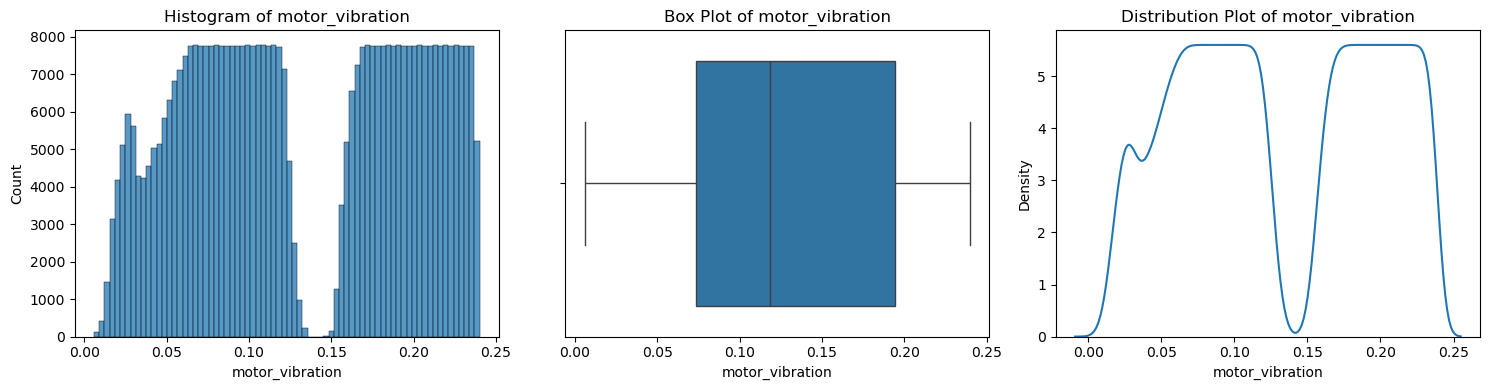

--------------------------------------------------
Univariate Analysis for column: bearing_temperature


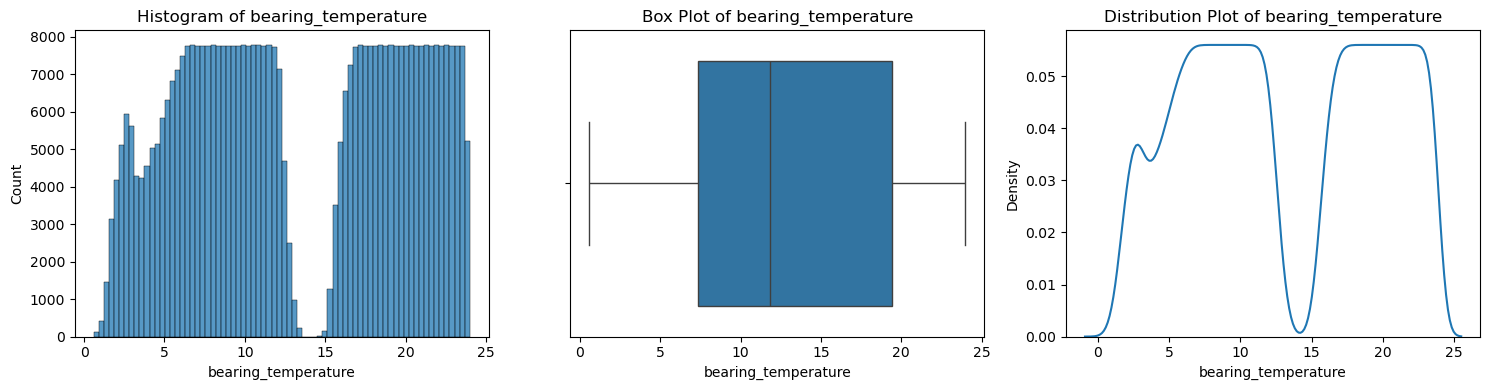

--------------------------------------------------
Univariate Analysis for column: impeller_wear_rate


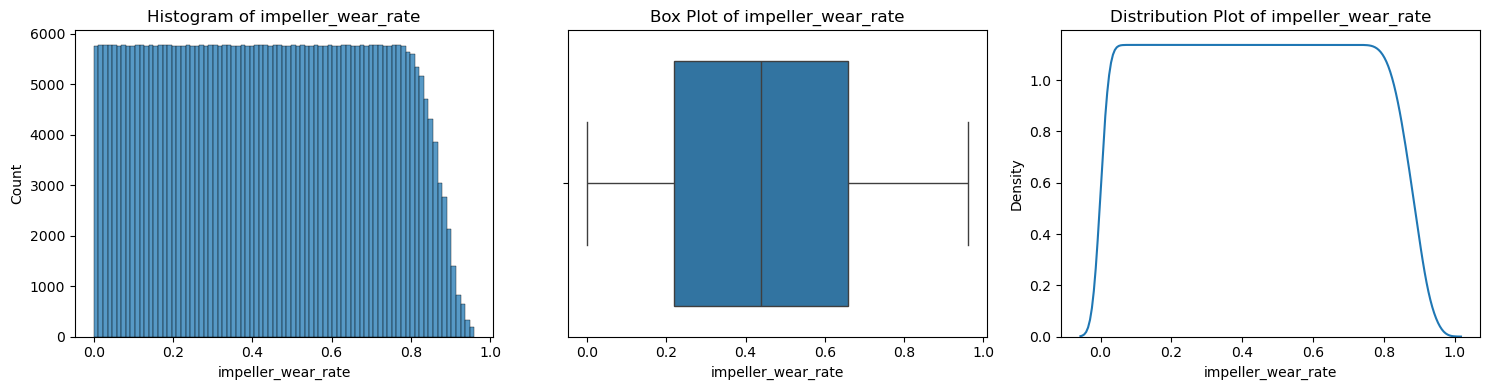

--------------------------------------------------
Univariate Analysis for column: impeller_surface_roughness


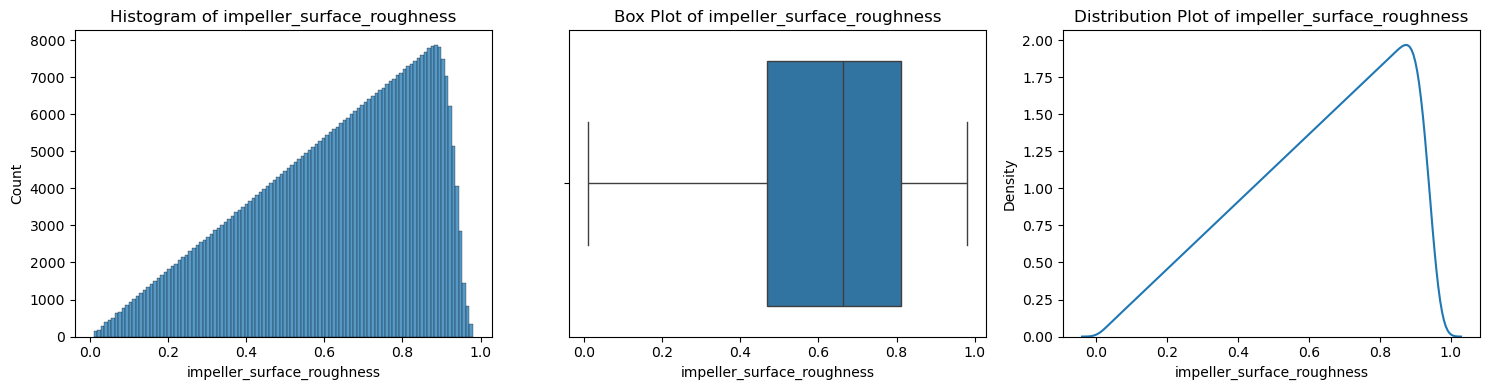

--------------------------------------------------
Univariate Analysis for column: impeller_efficiency_loss


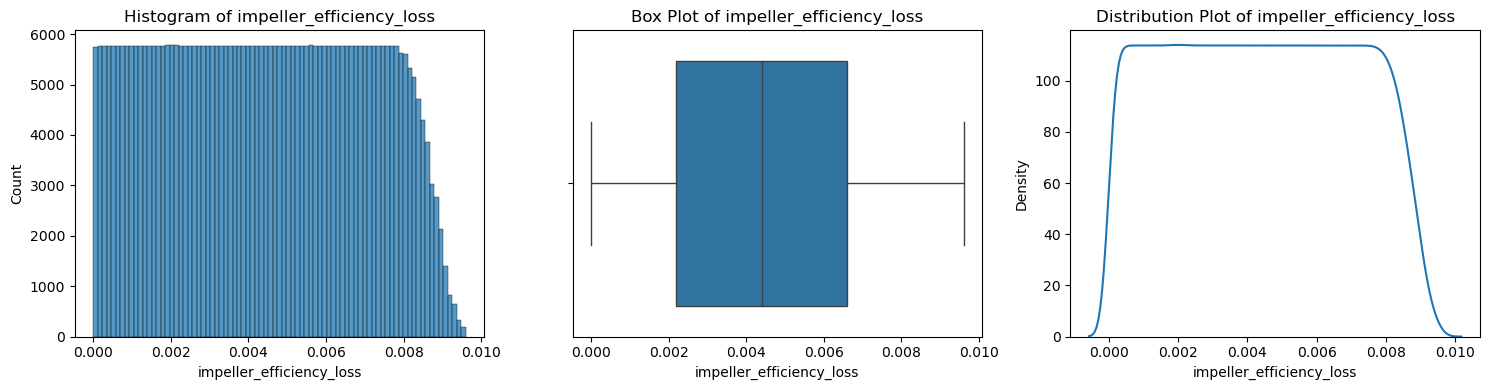

--------------------------------------------------
Univariate Analysis for column: seal_leakage_rate


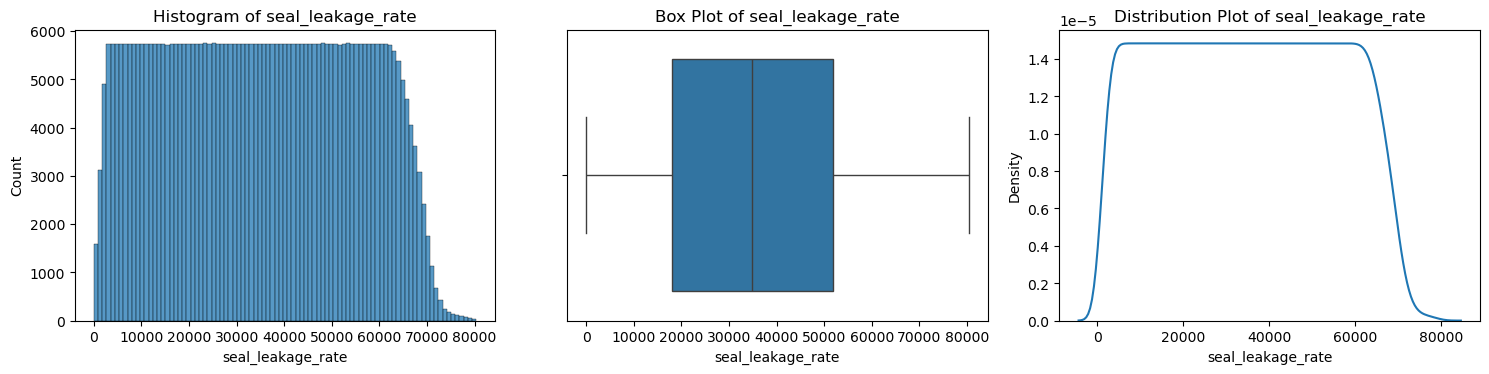

--------------------------------------------------
Univariate Analysis for column: power


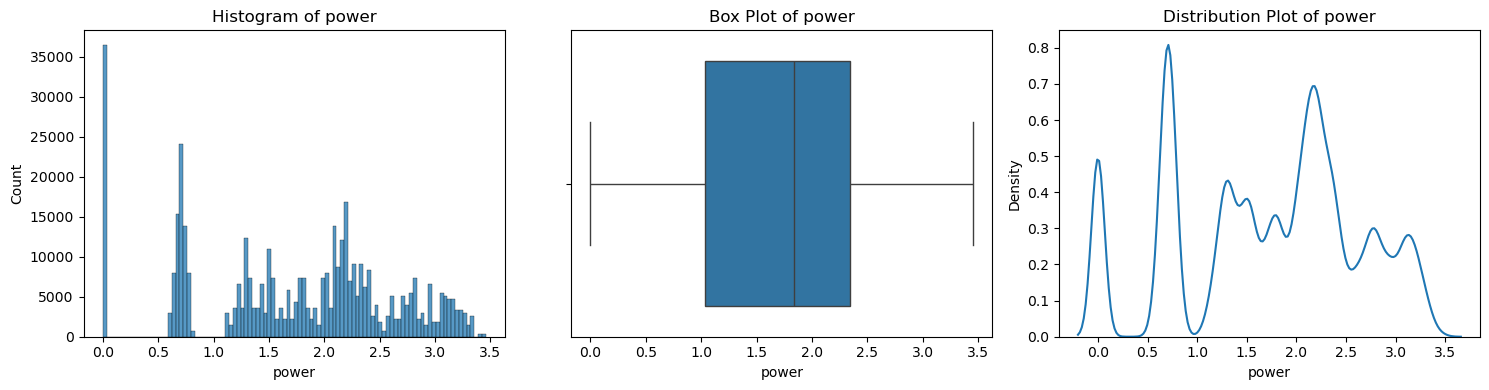

--------------------------------------------------
Univariate Analysis for column: efficiency


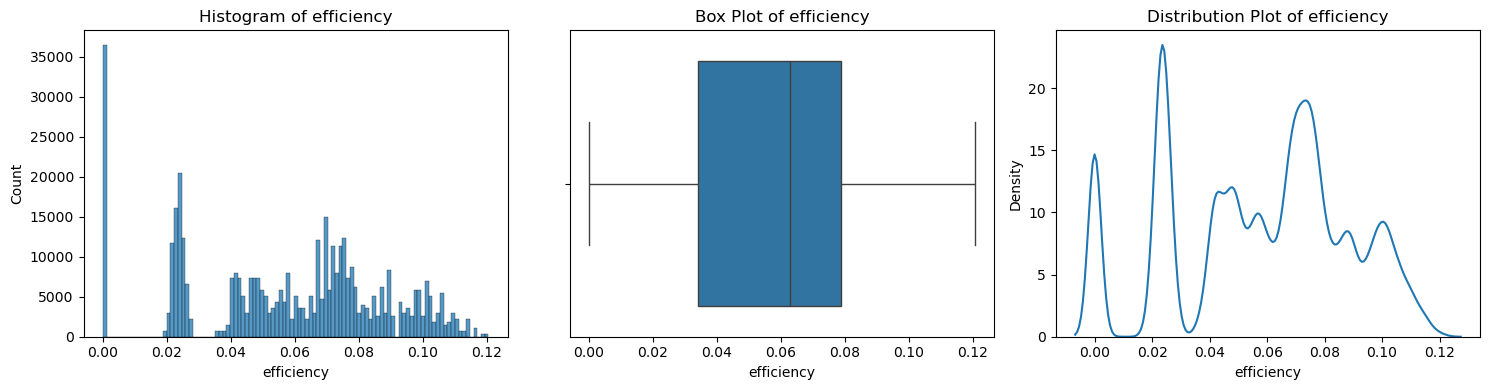

--------------------------------------------------
Univariate Analysis for column: ambient_temperature


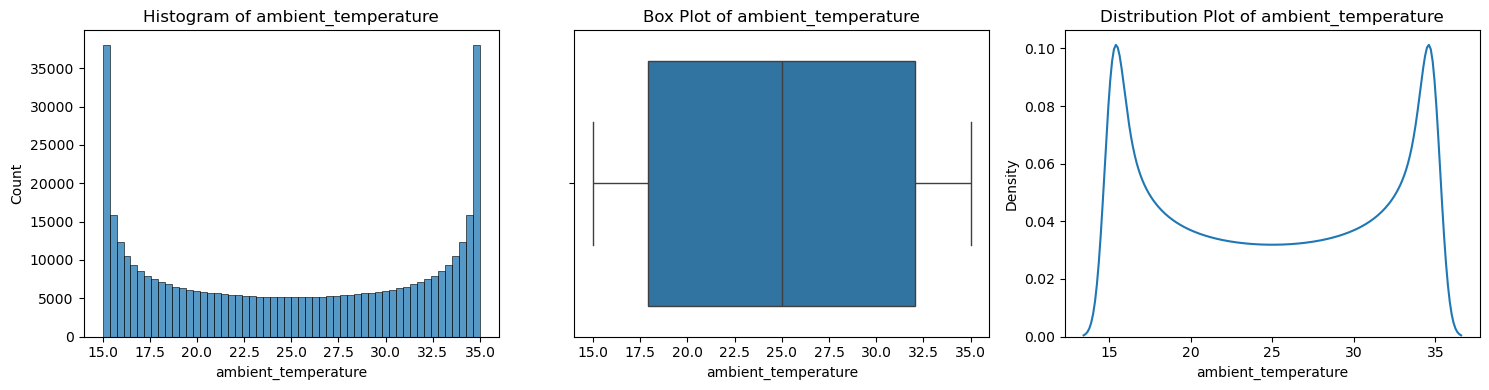

--------------------------------------------------
Univariate Analysis for column: humidity


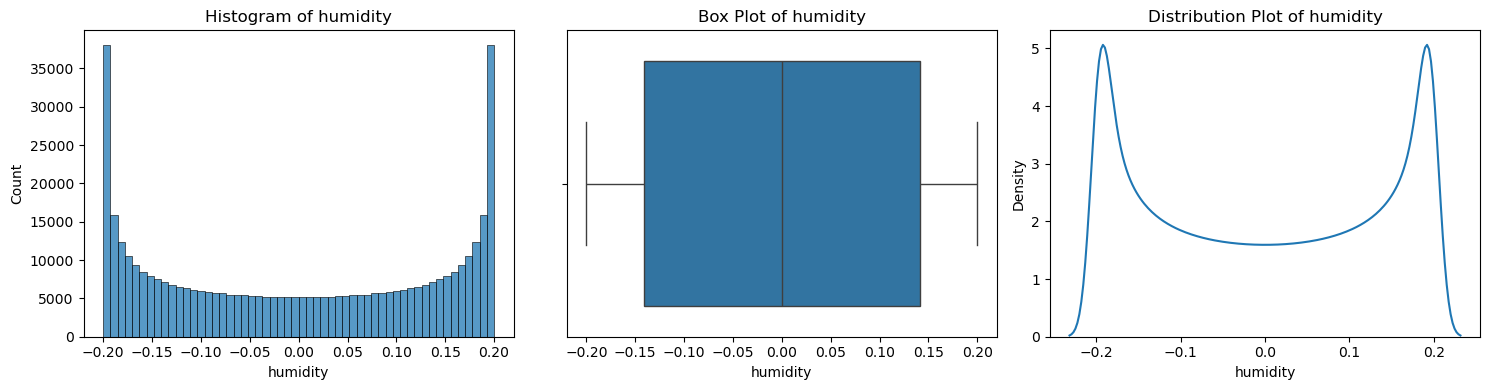

--------------------------------------------------
Univariate Analysis for column: degradation_physics


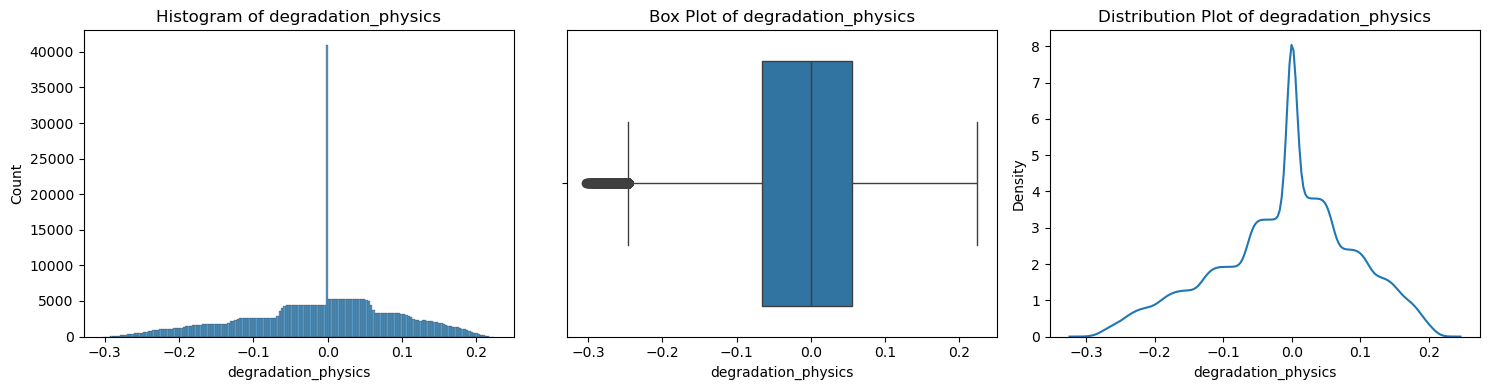

--------------------------------------------------
Univariate Analysis for column: degradation_ml


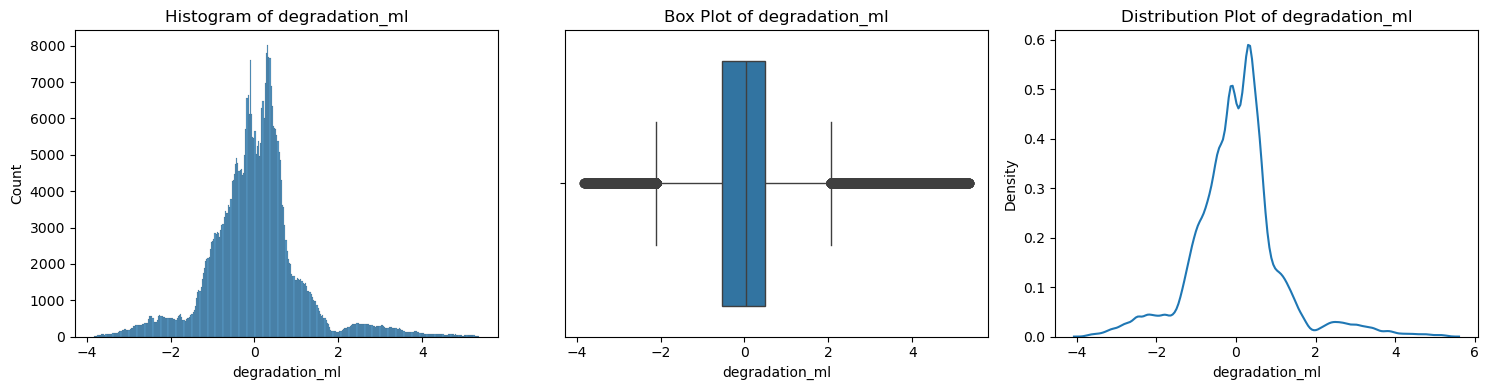

--------------------------------------------------


In [21]:
# Numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

# Remove the pump_id column because we dont need it
numerical_cols.remove('pump_id')

# Univariate Analysis
for col in numerical_cols:
    print(f"Univariate Analysis for column: {col}")

    # Create a figure with 3 subplots in a horizontal layout
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 4))
    
    # 1. Histogram
    sns.histplot(df[col], kde=False, ax=ax1)
    ax1.set_title(f"Histogram of {col}")
    
    # 2. Box Plot
    sns.boxplot(x=df[col], ax=ax2)
    ax2.set_title(f"Box Plot of {col}")
    
    # 3. Distribution Plot
    sns.kdeplot(df[col], ax=ax3)
    ax3.set_title(f"Distribution Plot of {col}")
    
    plt.tight_layout()
    plt.show()

    print("-" * 50)